# 1. loading Data

In [38]:
import pandas as pd

url = './data/train.csv'
mushroom_train = pd.read_csv(url)


In [39]:
mushroom_train


,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


### 1.1 prepare data, check for null values, Ddatatypes etc.

In [27]:
mushroom_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cap.shape               6499 non-null   object
 1   cap.color               6499 non-null   object
 2   bruises                 6499 non-null   bool  
 3   stalk.color.above.ring  6499 non-null   object
 4   stalk.color.below.ring  6499 non-null   object
 5   population              6499 non-null   object
 6   Id                      6499 non-null   int64 
 7   poisonous               6499 non-null   int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 361.9+ KB


change bruises to integer later

# 2. testing different algorithms

### 2.1 ROC curve

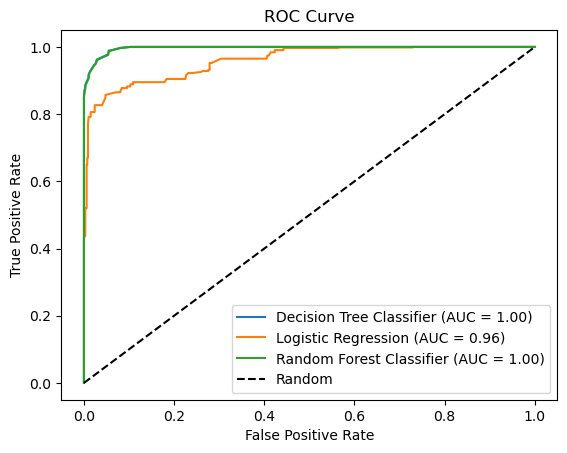

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming your target variable is named 'poisonous'
X = mushroom_train.drop(['Id', 'poisonous'], axis=1)
y = mushroom_train['poisonous']

# Convert boolean column 'bruises' to integer (0s and 1s)
X['bruises'] = X['bruises'].astype(int)

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred_proba = dtc.predict_proba(X_test)[:, 1]
dtc_auc = roc_auc_score(y_test, dtc_pred_proba)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_pred_proba)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred_proba = logreg.predict_proba(X_test)[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_pred_proba)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_pred_proba)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred_proba = rfc.predict_proba(X_test)[:, 1]
rfc_auc = roc_auc_score(y_test, rfc_pred_proba)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred_proba)

# Plot ROC curves
plt.plot(dtc_fpr, dtc_tpr,
         label='Decision Tree Classifier (AUC = {:.2f})'.format(dtc_auc))
plt.plot(logreg_fpr, logreg_tpr,
         label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot(rfc_fpr, rfc_tpr,
         label='Random Forest Classifier (AUC = {:.2f})'.format(rfc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


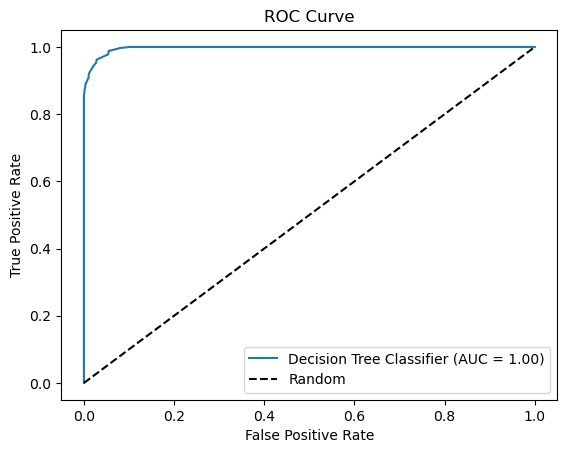

In [29]:
# Plot ROC Decision tree because it was hidden under Random Forest Classifier
plt.plot(dtc_fpr, dtc_tpr,
         label='Decision Tree Classifier (AUC = {:.2f})'.format(dtc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### 2.2 get sensitivity and cross validation score

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming your target variable is named 'poisonous'
X = mushroom_train.drop(['Id', 'poisonous'], axis=1)
y = mushroom_train['poisonous']

# Convert boolean column 'bruises' to integer (0s and 1s)
X['bruises'] = X['bruises'].astype(int)

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred_proba = dtc.predict_proba(X_test)[:, 1]
dtc_auc = roc_auc_score(y_test, dtc_pred_proba)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_pred_proba)
dtc_pred = dtc.predict(X_test)
dtc_confusion = confusion_matrix(y_test, dtc_pred)
dtc_tn, dtc_fp, dtc_fn, dtc_tp = dtc_confusion.ravel()
dtc_sensitivity = dtc_tp / (dtc_tp + dtc_fn)
dtc_specificity = dtc_tn / (dtc_tn + dtc_fp)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred_proba = logreg.predict_proba(X_test)[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_pred_proba)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_pred_proba)
logreg_pred = logreg.predict(X_test)
logreg_confusion = confusion_matrix(y_test, logreg_pred)
logreg_tn, logreg_fp, logreg_fn, logreg_tp = logreg_confusion.ravel()
logreg_sensitivity = logreg_tp / (logreg_tp + logreg_fn)
logreg_specificity = logreg_tn / (logreg_tn + logreg_fp)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred_proba = rfc.predict_proba(X_test)[:, 1]
rfc_auc = roc_auc_score(y_test, rfc_pred_proba)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred_proba)
rfc_pred = rfc.predict(X_test)
rfc_confusion = confusion_matrix(y_test, rfc_pred)

rfc_confusion = confusion_matrix(y_test, rfc_pred)
rfc_tn, rfc_fp, rfc_fn, rfc_tp = rfc_confusion.ravel()
rfc_sensitivity = rfc_tp / (rfc_tp + rfc_fn)
rfc_specificity = rfc_tn / (rfc_tn + rfc_fp)

print(f"dtc_sensitivity: {dtc_sensitivity}")
print(f"logreg_sensitivity: {logreg_sensitivity}")
print(f"rfc_sensitivity: {rfc_sensitivity}")


print(f"dtc_specificity: {dtc_specificity}")
print(f"logreg_specificity: {logreg_specificity}")
print(f"rfc_specificity: {rfc_specificity}")

# Cross-validation
dtc_cv_scores = cross_val_score(dtc, X, y, cv=5, scoring='roc_auc')
logreg_cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
rfc_cv_scores = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')

print("Decision Tree Classifier Cross-Validation Scores:", dtc_cv_scores)
print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Random Forest Classifier Cross-Validation Scores:", rfc_cv_scores)


dtc_sensitivity: 0.9675425038639877
logreg_sensitivity: 0.8979907264296755
rfc_sensitivity: 0.9675425038639877
dtc_specificity: 0.9509954058192955
logreg_specificity: 0.8820826952526799
rfc_specificity: 0.9509954058192955


/home/almuth/Documents/anaconda3/envs/pdenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/almuth/Documents/anaconda3/envs/pdenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Decision Tree Classifier Cross-Validation Scores: [0.9929437  0.99470363 0.99750556 0.99378641 0.99505703]
Logistic Regression Cross-Validation Scores: [0.95671474 0.95259323 0.96866672 0.952595   0.96116088]
Random Forest Classifier Cross-Validation Scores: [0.99371352 0.99461599 0.99736106 0.99478489 0.99496095]


### Setting threshold & getting sensitivity and specificity

Sensitivity (True positive rate) - what percentage of poisenous mushrooms were correctly identified --> more important for us - no one should die \
Specificity (False Positive Rate)- what percentage of unpoisenous mushrooms were correctly identfied


In [40]:
# Set the desired threshold
threshold = 0.1

# Modify the predictions based on the threshold
dtc_pred_modified = (dtc_pred_proba >= threshold).astype(int)
logreg_pred_modified = (logreg_pred_proba >= threshold).astype(int)
rfc_pred_modified = (rfc_pred_proba >= threshold).astype(int)

# Calculate the modified confusion matrices
dtc_confusion_modified = confusion_matrix(y_test, dtc_pred_modified)
logreg_confusion_modified = confusion_matrix(y_test, logreg_pred_modified)
rfc_confusion_modified = confusion_matrix(y_test, rfc_pred_modified)

# Calculate Sensitivity and Specificity based on the modified predictions
dtc_tn_modified, dtc_fp_modified, dtc_fn_modified, dtc_tp_modified = dtc_confusion_modified.ravel()
dtc_sensitivity_modified = dtc_tp_modified / \
    (dtc_tp_modified + dtc_fn_modified)
dtc_specificity_modified = dtc_tn_modified / \
    (dtc_tn_modified + dtc_fp_modified)

logreg_tn_modified, logreg_fp_modified, logreg_fn_modified, logreg_tp_modified = logreg_confusion_modified.ravel()
logreg_sensitivity_modified = logreg_tp_modified / \
    (logreg_tp_modified + logreg_fn_modified)
logreg_specificity_modified = logreg_tn_modified / \
    (logreg_tn_modified + logreg_fp_modified)

rfc_tn_modified, rfc_fp_modified, rfc_fn_modified, rfc_tp_modified = rfc_confusion_modified.ravel()
rfc_sensitivity_modified = rfc_tp_modified / \
    (rfc_tp_modified + rfc_fn_modified)
rfc_specificity_modified = rfc_tn_modified / \
    (rfc_tn_modified + rfc_fp_modified)

# Print the modified Sensitivity and Specificity
print("Decision Tree Classifier Sensitivity (Modified):", dtc_sensitivity_modified)
print("Decision Tree Classifier Specificity (Modified):", dtc_specificity_modified)
print("Logistic Regression Sensitivity (Modified):", logreg_sensitivity_modified)
print("Logistic Regression Specificity (Modified):", logreg_specificity_modified)
print("Random Forest Classifier Sensitivity (Modified):", rfc_sensitivity_modified)
print("Random Forest Classifier Specificity (Modified):", rfc_specificity_modified)


Decision Tree Classifier Sensitivity (Modified): 1.0
Decision Tree Classifier Specificity (Modified): 0.891271056661562
Logistic Regression Sensitivity (Modified): 0.9675425038639877
Logistic Regression Specificity (Modified): 0.6171516079632465
Random Forest Classifier Sensitivity (Modified): 1.0
Random Forest Classifier Specificity (Modified): 0.889739663093415


### displaying confusion Matrix for random forest classifier

Goal is to have no real poisenous mushrooms being classified as not poisenous, whereas we can have some predicted as poisenous which are actually harmless.

In [41]:
confusion_matrix(y_test, dtc_pred_modified)


array([[582,  71],
       [  0, 647]])

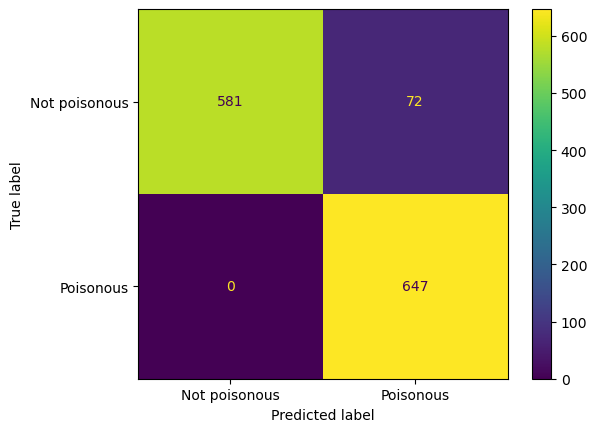

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(
    y_test, rfc_pred_modified, display_labels=['Not poisonous', 'Poisonous'])


# Submission

In [37]:
# reading the test.csv
url_test = "/home/almuth/Documents/_data_science_bootcamp/Bootcamp/week7_supervised_ml/mushroom_competition/data/test.csv"
data_test = pd.read_csv(url_test)

# Create a new DataFrame containing only the "Id" column from the test dataset
id_column = data_test['Id']

# Modify the predictions based on the threshold for the Random Forest Classifier
rfc_pred_modified = (rfc_pred_proba >= threshold).astype(int)

# Create a new DataFrame containing the modified predictions for the "poisonous" column
poisonous_column = pd.DataFrame(
    {'Random Forest Classifier': rfc_pred_modified})

# Combine the "Id" column and the "poisonous" column into a single DataFrame
result = pd.concat([id_column, poisonous_column], axis=1)

# Save the resulting DataFrame to a new file
result.to_csv(index=False)

# Calculate the modified confusion matrix for the Random Forest Classifier
rfc_confusion_modified = confusion_matrix(y_test, rfc_pred_modified)

# Calculate Sensitivity and Specificity based on the modified predictions for the Random Forest Classifier
rfc_tn_modified, rfc_fp_modified, rfc_fn_modified, rfc_tp_modified = rfc_confusion_modified.ravel()
rfc_sensitivity_modified = rfc_tp_modified / \
    (rfc_tp_modified + rfc_fn_modified)
rfc_specificity_modified = rfc_tn_modified / \
    (rfc_tn_modified + rfc_fp_modified)

# Print the modified Sensitivity and Specificity for the Random Forest Classifier
print("Random Forest Classifier Sensitivity (Modified):", rfc_sensitivity_modified)
print("Random Forest Classifier Specificity (Modified):", rfc_specificity_modified)


Random Forest Classifier Sensitivity (Modified): 1.0
Random Forest Classifier Specificity (Modified): 0.885145482388974
